In [15]:
#analytics
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from entropy_python_library.entropy.entropy import *
import mass_ts as mts
from scipy.io import arff

import stumpy
# visuals
import matplotlib.pyplot as plt

/Users/tortysivill/.pyenv/versions/3.7.3/envs/entropy/lib/python3.7/site-packages/mass_ts/_mass_ts.py:18: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  'GPU support will not work. You must pip install mass-ts[gpu].')


In [16]:
import complexityparameters

## Import Condition Data

In [17]:
path = "data/useful/coffee/Coffee/"

In [18]:
data = arff.loadarff(path+'Coffee_TRAIN.arff')
print(len(data))
df_data = pd.DataFrame(data[0])

df_data.head()

data_test = arff.loadarff(path+'Coffee_TEST.arff')
df_data_test = pd.DataFrame(data_test[0])

2


In [19]:
Xtrain = df_data.drop(columns=['target']).values
ytrain = df_data['target']

Xtest = df_data_test.drop(columns=['target']).values
ytest = df_data_test['target']

In [20]:
len(Xtrain)

28

In [21]:
len(Xtest)

28

In [22]:
temp_list = []

for x in Xtrain:
    temp_list.append(x)

for x in Xtest:
    temp_list.append(x)
    
len(temp_list)
training_data_raw = temp_list.copy()

In [23]:
len(training_data_raw)

56

In [24]:
len(training_data_raw[2])

286

In [25]:
temp_list = []

for x in ytrain:
    temp_list.append(x)

for x in ytest:
    temp_list.append(x)

y = temp_list.copy()
len(y)

56

In [26]:
training_data_raw[0]

array([-0.51841899, -0.48588363, -0.50500747, -0.56018294, -0.63629941,
       -0.75322902, -0.82722915, -0.85976467, -0.90632072, -0.92379648,
       -0.93321222, -0.93442926, -0.92078716, -0.93657191, -0.95599685,
       -0.95934101, -0.96940599, -0.9824055 , -0.97659952, -0.96252576,
       -0.97031893, -0.98199237, -0.9874616 , -1.0152202 , -1.0480611 ,
       -1.0592421 , -1.0498854 , -1.0467321 , -1.0643986 , -1.0877935 ,
       -1.0993351 , -1.0850813 , -1.0641912 , -1.0545229 , -1.044503  ,
       -1.0236367 , -0.99421712, -0.96371982, -0.92237217, -0.86616903,
       -0.81351574, -0.77266759, -0.72343976, -0.66424331, -0.63424598,
       -0.6280451 , -0.60469363, -0.56829781, -0.53778323, -0.50569966,
       -0.4612259 , -0.38892741, -0.29296669, -0.20056328, -0.09099993,
        0.00841905,  0.08265814,  0.22029375,  0.34217234,  0.42883427,
        0.55487916,  0.54987503,  0.51045674,  0.60485004,  0.6628724 ,
        0.64908008,  0.70823327,  0.79018805,  0.86140673,  0.90

In [27]:
count = 0
for item in y:
    if item == b'1':
        count = count + 1
        
print(count)

27


In [28]:
y

[b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'0',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1']

In [29]:
def normalise(X):
    return [(x - min(X))/(max(X)-min(X)) for x in X]

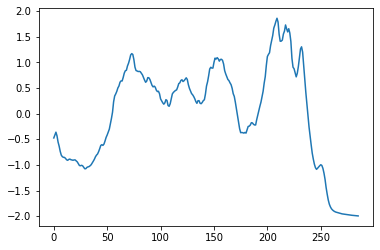

In [30]:

plt.plot(training_data_raw[2])

## Import Control Data

### Extracting the following features from selected data

<ol>
<li>Mean Activity Level</li>
<li>Standard Deviation</li>
<li> Trimmed Mean </li>
</ol>

## Aggregate Features

## Parameter Suite

In [31]:
normalised_complexity_feature_df = complexityparameters.normalised_complexity_features(training_data_raw)

In [32]:
normalised_summary_feature_df = complexityparameters.normalised_summary_features(training_data_raw)

In [33]:
normalised_all_feature_df = complexityparameters.normalised_all_features(training_data_raw)

In [34]:
normalised_summary_feature_df['mean'] = normalise([np.mean(instance) for instance in training_data_raw])
normalised_summary_feature_df['std'] = normalise([np.std(instance) for instance in training_data_raw])
#normalised_summary_feature_df['complexity_feature'] = get_features(80, 0)

### Models 

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


classifiers = [
    KNeighborsClassifier(1),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


### results from each complexity parameter and all summary features

In [35]:
from sklearn.ensemble import RandomForestClassifier

temp_summary_feature_df = normalised_summary_feature_df.copy()

rfc = RandomForestClassifier()
for column in normalised_complexity_feature_df:
    temp_summary_feature_df['complexity_feature'] = normalised_complexity_feature_df[[column]]
    X = temp_summary_feature_df.dropna(axis='columns').values
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    F1_scores = []

    accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
    precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
    recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
    F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

    print(column)
    print(np.mean(accuracy_scores,axis=1))
    print(np.mean(precision_scores,axis=1))
    print(np.mean(recall_scores,axis=1))
    print(np.mean(F1_scores,axis=1))


    print(np.std(accuracy_scores,axis=1))
    print(np.std(precision_scores,axis=1))
    print(np.std(recall_scores,axis=1))
    print(np.std(F1_scores,axis=1))


lempel_ziv
[0.98333333]
[0.9875]
[0.98333333]
[0.98285714]
[0.05]
[0.0375]
[0.05]
[0.05142857]
approx
[0.94333333]
[0.9725]
[0.98333333]
[0.96095238]
[0.08698659]
[0.05528336]
[0.05]
[0.0788178]
sample
[0.96333333]
[0.9725]
[0.98333333]
[0.98285714]
[0.07371115]
[0.05528336]
[0.05]
[0.05142857]
permutation
[0.96333333]
[0.9725]
[0.98333333]
[0.96095238]
[0.07371115]
[0.05528336]
[0.05]
[0.0788178]
spectral
[0.96333333]
[0.9875]
[0.96333333]
[0.96095238]
[0.07371115]
[0.0375]
[0.07371115]
[0.0788178]
skewness
[0.98333333]
[0.9725]
[0.98333333]
[0.98285714]
[0.05]
[0.05528336]
[0.05]
[0.05142857]
kurtosis
[0.96333333]
[0.9725]
[0.96333333]
[0.96095238]
[0.07371115]
[0.05528336]
[0.07371115]
[0.0788178]
SVD
[0.94333333]
[0.9725]
[0.96333333]
[0.96095238]
[0.08698659]
[0.05528336]
[0.07371115]
[0.0788178]


### Results from ALL features

In [36]:
from sklearn.ensemble import RandomForestClassifier

temp_all_feature_df = normalised_all_feature_df.copy()
temp_all_feature_df['mean'] = normalise([np.mean(instance) for instance in training_data_raw])
temp_all_feature_df['std'] = normalise([np.std(instance) for instance in training_data_raw])

X = temp_all_feature_df.dropna(axis='columns').values
#for rfc in classifiers:
rfc = RandomForestClassifier()

print(rfc)
accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []

accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.96333333]
[0.9725]
[0.96333333]
[0.96095238]
[0.07371115]
[0.05528336]
[0.07371115]
[0.0788178]


### Dont want all features - curse of dimensionality and not very intepretable - lets try and think more about our features

In [23]:
import seaborn as sn

#### lets plot correlation for the complexity features

In [24]:
corrMatrix = normalised_complexity_feature_df.corr()

#### visualise correlation matrix

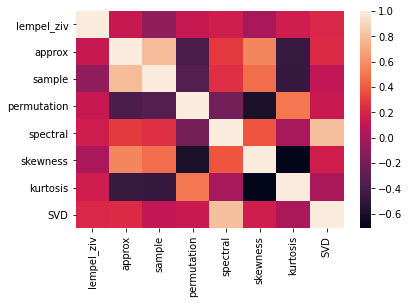

In [25]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [26]:
### lets plot correlation for the summary features (first half)

In [27]:
corrMatrix = normalised_summary_feature_df.iloc[:, 0:10].corr()

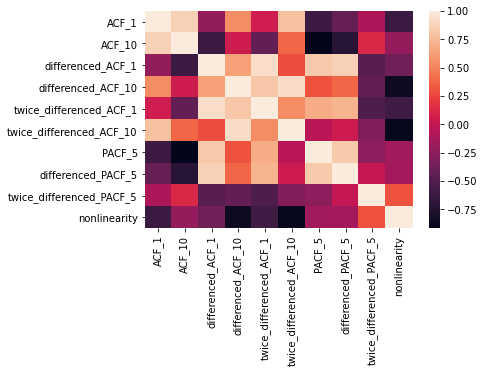

In [28]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

#### lets plot correlation for the summary features (second half)

In [29]:
corrMatrix = normalised_summary_feature_df.iloc[:, 10:].corr()

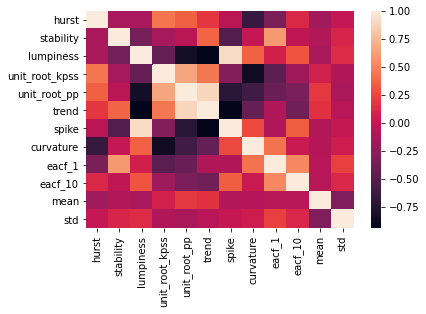

In [30]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [31]:
#### lets plot correlation for the summary features (second half)

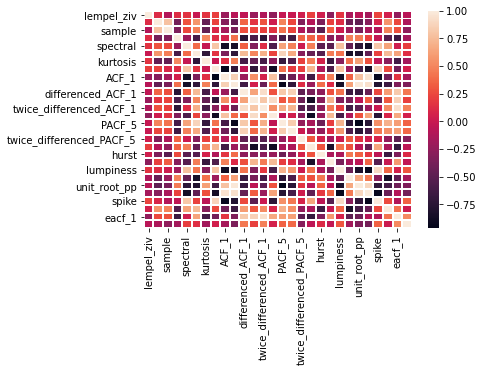

In [32]:
corrMatrix = normalised_all_feature_df.corr()
sn.heatmap(corrMatrix, annot=False, linewidths=1.)
plt.savefig('correlation_matrix.eps')
plt.show()

### Feature Importances

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

model = RandomForestClassifier().fit(X_train, y_train)
print(model.score(X_val, y_val))

1.0


### Permutation Feature Importance

In [34]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,n_repeats=30,random_state=0)

Depresjon_feature_names = temp_all_feature_df.dropna(axis='columns').columns
for i in r.importances_mean.argsort()[::-1]:
    print(f"{Depresjon_feature_names[i]:<8}"f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")

lumpiness0.029 +/- 0.035
spike   0.017 +/- 0.030
std     0.000 +/- 0.000
twice_differenced_ACF_100.000 +/- 0.000
approx  0.000 +/- 0.000
sample  0.000 +/- 0.000
permutation0.000 +/- 0.000
spectral0.000 +/- 0.000
skewness0.000 +/- 0.000
kurtosis0.000 +/- 0.000
SVD     0.000 +/- 0.000
ACF_1   0.000 +/- 0.000
ACF_10  0.000 +/- 0.000
differenced_ACF_10.000 +/- 0.000
differenced_ACF_100.000 +/- 0.000
twice_differenced_ACF_10.000 +/- 0.000
PACF_5  0.000 +/- 0.000
mean    0.000 +/- 0.000
differenced_PACF_50.000 +/- 0.000
twice_differenced_PACF_50.000 +/- 0.000
nonlinearity0.000 +/- 0.000
hurst   0.000 +/- 0.000
stability0.000 +/- 0.000
unit_root_kpss0.000 +/- 0.000
unit_root_pp0.000 +/- 0.000
trend   0.000 +/- 0.000
curvature0.000 +/- 0.000
eacf_1  0.000 +/- 0.000
eacf_10 0.000 +/- 0.000
lempel_ziv0.000 +/- 0.000


### LIME

21-Feb-26 14:54:54 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.
21-Feb-26 14:54:55 fatf.transparency.predictions.surrogate_explainers INFO     Selecting 30 features with highest weights.


{'condition': {'*lempel_ziv* <= 0.50': 0.02363276853695362, '0.39 < *approx* <= 0.54': 0.02486293301216288, '0.48 < *sample* <= 0.61': -0.03150037612826776, '0.43 < *permutation* <= 0.59': -0.01632170256226321, '*spectral* <= 0.37': 0.012251271237417097, '0.58 < *skewness* <= 0.76': -0.03720486900673969, '*kurtosis* <= 0.10': 0.004868583371766909, '0.31 < *SVD* <= 0.59': -0.017932980327874187, '0.45 < *ACF_1* <= 0.75': 0.08189154194884427, '0.44 < *ACF_10* <= 0.60': 0.010111373704935683, '*differenced_ACF_1* <= 0.57': -0.027887704085208683, '0.44 < *differenced_ACF_10* <= 0.61': -0.024832945640585774, '0.62 < *twice_differenced_ACF_1* <= 0.79': 0.0005818734159211618, '0.37 < *twice_differenced_ACF_10* <= 0.62': 0.10400041557987544, '0.41 < *PACF_5* <= 0.57': -0.03877320015294963, '*differenced_PACF_5* <= 0.39': -0.01428906925506033, '0.45 < *twice_differenced_PACF_5* <= 0.58': 0.0073472125124082405, '*nonlinearity* <= 0.21': 0.06406933612556051, '0.37 < *hurst* <= 0.58': -0.00997496890

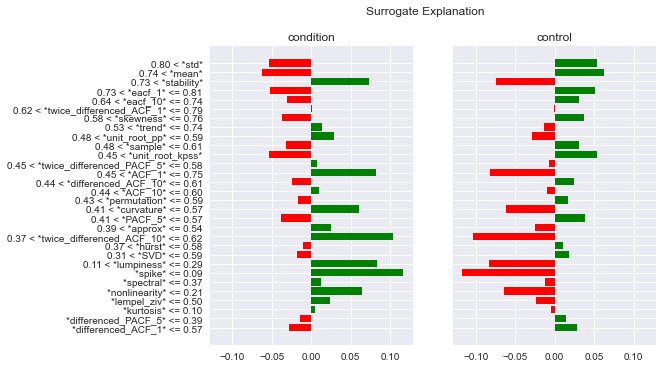

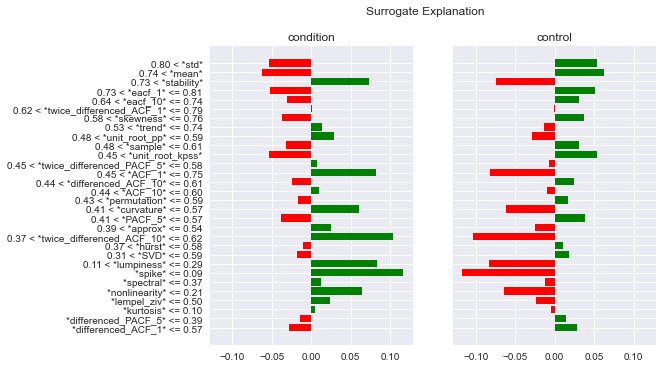

In [35]:
import fatf.transparency.predictions.surrogate_explainers as fatf_surrogates
import fatf.vis.lime as fatf_vis_lime

Depresjon_class_names = ['condition','control']
lime = fatf_surrogates.TabularBlimeyLime(
    X_train,
    model,
    feature_names=list(Depresjon_feature_names),
    class_names=Depresjon_class_names)

# Choose an index of the instance to be explained
index_to_explain = 0

# Explain an instance
lime_explanation = lime.explain_instance(
    X_train[index_to_explain, :], samples_number=50)

# Display the textual explanation
print(lime_explanation)

# Plot the explanation
fatf_vis_lime.plot_lime(lime_explanation)

In [36]:
### SHAP

Index(['lempel_ziv', 'approx', 'sample', 'permutation', 'spectral', 'skewness',
       'kurtosis', 'SVD', 'ACF_1', 'ACF_10', 'differenced_ACF_1',
       'differenced_ACF_10', 'twice_differenced_ACF_1',
       'twice_differenced_ACF_10', 'PACF_5', 'differenced_PACF_5',
       'twice_differenced_PACF_5', 'nonlinearity', 'hurst', 'stability',
       'lumpiness', 'unit_root_kpss', 'unit_root_pp', 'trend', 'spike',
       'curvature', 'eacf_1', 'eacf_10', 'mean', 'std'],
      dtype='object')


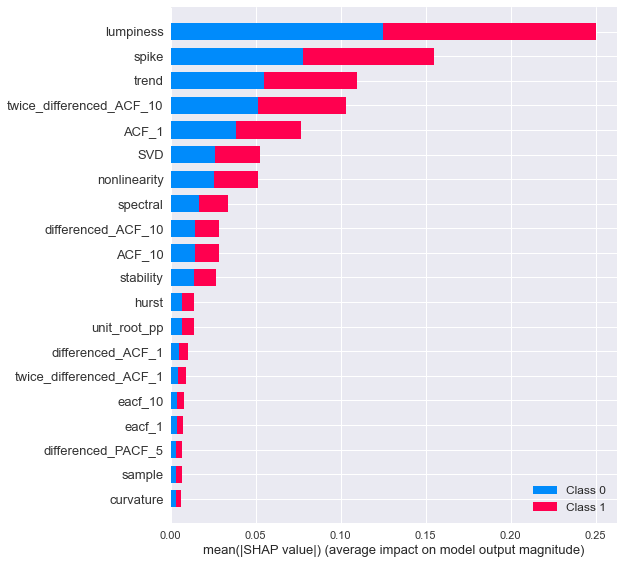

In [41]:
import shap
shap.initjs()

model = RandomForestClassifier().fit(normalised_all_feature_df.values, y)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(normalised_all_feature_df.values)
print(Depresjon_feature_names)
shap.summary_plot(shap_values, normalised_all_feature_df.values, Depresjon_feature_names)

In [58]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(normalised_all_feature_df.columns,vals)),columns=['col_name','feature_importance_vals'])

feature_importance['feature_importance_mean'] = np.mean(feature_importance['feature_importance_vals'])

feature_importance.sort_values(by=['feature_importance_mean'],ascending=False,inplace=True)
feature_importance.head()


top_5_features = feature_importance['col_name'][0:5].values
top_10_features = feature_importance['col_name'][0:10].values
top_15_features = feature_importance['col_name'][0:15].values
top_20_features = feature_importance['col_name'][0:20].values
top_25_features = feature_importance['col_name'][0:25].values
all_features = feature_importance['col_name'].values

feature_combinations = [top_5_features, top_10_features, top_15_features, top_20_features, top_25_features, all_features]

### Top Features

In [59]:
#### Spectral Entropy

In [61]:
from sklearn.ensemble import RandomForestClassifier


rfc = KNeighborsClassifier(n_neighbors=1)

for feature_combination in feature_combinations:
    temp_summary_feature_df = normalised_all_feature_df.copy()
    X = temp_summary_feature_df[feature_combination].values
    #top 10 features
    #X = temp_summary_feature_df[['complexity_feature', 'trend', 'unit_root_kpss', 'mean', 'eacf_10', 'std', 'ACF_10', 'curvature', 'twice_differenced_ACF_10', 'stability', 'spike']].values

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    F1_scores = []

    accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
    recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
    F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

    print(feature_combination)
    print(np.mean(accuracy_scores,axis=1))
    print(np.mean(precision_scores,axis=1))
    print(np.mean(recall_scores,axis=1))
    print(np.mean(F1_scores,axis=1))


    print(np.std(accuracy_scores,axis=1))
    print(np.std(precision_scores,axis=1))
    print(np.std(recall_scores,axis=1))
    print(np.std(F1_scores,axis=1))

['lumpiness' 'spike' 'trend' 'twice_differenced_ACF_10' 'ACF_1']
[0.96666667]
[0.975]
[0.96666667]
[0.96571429]
[0.06666667]
[0.05]
[0.06666667]
[0.06857143]
['lumpiness' 'spike' 'trend' 'twice_differenced_ACF_10' 'ACF_1' 'SVD'
 'nonlinearity' 'spectral' 'differenced_ACF_10' 'ACF_10']
[0.98333333]
[0.9875]
[0.98333333]
[0.98285714]
[0.05]
[0.0375]
[0.05]
[0.05142857]
['lumpiness' 'spike' 'trend' 'twice_differenced_ACF_10' 'ACF_1' 'SVD'
 'nonlinearity' 'spectral' 'differenced_ACF_10' 'ACF_10' 'stability'
 'hurst' 'unit_root_pp' 'differenced_ACF_1' 'eacf_10']
[0.98333333]
[0.9875]
[0.98333333]
[0.98285714]
[0.05]
[0.0375]
[0.05]
[0.05142857]
['lumpiness' 'spike' 'trend' 'twice_differenced_ACF_10' 'ACF_1' 'SVD'
 'nonlinearity' 'spectral' 'differenced_ACF_10' 'ACF_10' 'stability'
 'hurst' 'unit_root_pp' 'differenced_ACF_1' 'eacf_10'
 'twice_differenced_ACF_1' 'eacf_1' 'curvature' 'differenced_PACF_5'
 'sample']
[0.98333333]
[0.9875]
[0.98333333]
[0.98285714]
[0.05]
[0.0375]
[0.05]
[0.05142

### No Complexity Features

In [63]:
from sklearn.ensemble import RandomForestClassifier


rfc = KNeighborsClassifier(n_neighbors=1)

temp_summary_feature_df = normalised_summary_feature_df.copy()
X = temp_summary_feature_df.dropna(axis='columns').values
#top 10 features
#X = temp_summary_feature_df[['complexity_feature', 'trend', 'unit_root_kpss', 'mean', 'eacf_10', 'std', 'ACF_10', 'curvature', 'twice_differenced_ACF_10', 'stability', 'spike']].values

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []

accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

print(feature_combination)
print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))

['lumpiness' 'spike' 'trend' 'twice_differenced_ACF_10' 'ACF_1' 'SVD'
 'nonlinearity' 'spectral' 'differenced_ACF_10' 'ACF_10' 'stability'
 'hurst' 'unit_root_pp' 'differenced_ACF_1' 'eacf_10'
 'twice_differenced_ACF_1' 'eacf_1' 'curvature' 'differenced_PACF_5'
 'sample' 'kurtosis' 'PACF_5' 'unit_root_kpss' 'twice_differenced_PACF_5'
 'skewness' 'approx' 'lempel_ziv' 'permutation']
[0.98333333]
[0.9875]
[0.98333333]
[0.98285714]
[0.05]
[0.0375]
[0.05]
[0.05142857]


In [43]:
temp_summary_feature_df = normalised_summary_feature_df.copy()

X = temp_summary_feature_df.dropna(axis='columns')
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

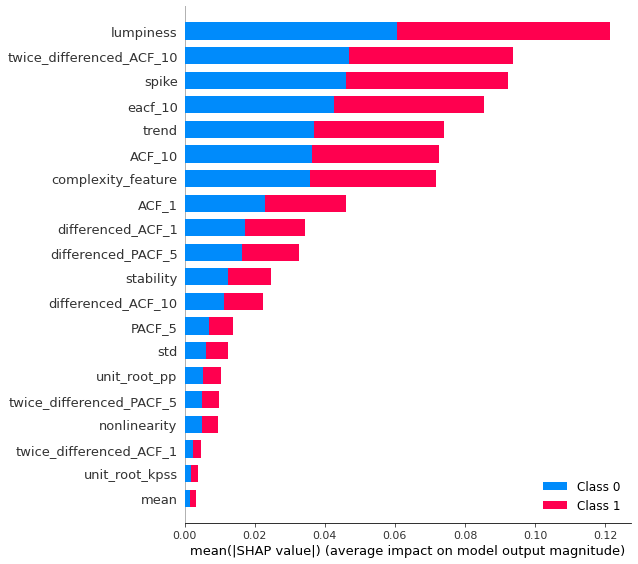

In [44]:
import shap
shap.initjs()

model = RandomForestClassifier().fit(X_val.values, y_val)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val.values)
shap.summary_plot(shap_values, X_val.values, normalised_summary_feature_df.dropna(axis='columns').columns )

In [45]:
X_selected = X_train[['complexity_feature','lumpiness', 'twice_differenced_ACF_1','spike','eacf_10']]


rfc = RandomForestClassifier()

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))

[0.975]
[0.98333333]
[0.975]
[0.97333333]
[0.075]
[0.05]
[0.075]
[0.08]


### My Features

In [36]:
window_size_parameter = 80

In [37]:
def DP_entropy(x,window): 
    time_series = np.array(x,dtype=float)
    matrix_profile = stumpy.stump(time_series, m=window)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    distance_sum = np.sum(df_matrix_profile['distances'])
    entropy = -np.sum([(x/distance_sum)*np.log(x/distance_sum) for x in df_matrix_profile['distances']])
    return entropy

In [38]:
from scipy import signal

def DP_flatness_motif(x,window):
    time_series = np.array(x,dtype=float)
    my_window = len(time_series) - window
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')[0:10]
    distance_sum = np.sum(top_motifs['distances'])
    entropy_sum = np.sum([np.log(x) for x in top_motifs['distances']])
    entropy = entropy_sum * 1/len(top_motifs['distances'])
    entropy = np.exp(entropy)
    #entropy = entropy/(distance_sum/len(top_motifs['distances']))
    return entropy

In [39]:
from scipy import signal

def DP_flatness(x,window):
    time_series = np.array(x,dtype=float)
    my_window = len(time_series) - window
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')
    distance_sum = np.sum(df_matrix_profile['distances'])
    entropy_sum = np.sum([np.log(x) for x in df_matrix_profile['distances']])
    entropy = entropy_sum * 1/len(df_matrix_profile['distances'])
    entropy = np.exp(entropy)
    entropy = entropy/(distance_sum/len(df_matrix_profile['distances']))
    return entropy

In [40]:
def sequential_entropy(x,window):
    yes = 0
    time_series = np.array(x,dtype=float)
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['left_index']= matrix_profile[:,1]
    a_s = len(df_matrix_profile.index)
    for x in range(0,len(df_matrix_profile.index)-1):
        if df_matrix_profile['left_index'].iloc[x+1] == df_matrix_profile['left_index'].iloc[x] + 1:
            yes = yes + 1
    return np.log(a_s) - np.log(yes)

In [41]:
def calculate_DP(x):
    matrix_profile_A = stumpy.stump(x, m=50)
    matrix_profile_B = stumpy.stump(x, m=80)
    matrix_profile_C = stumpy.stump(x, m=100)
    matrix_profile_D = stumpy.stump(x, m=70)

    matrix_profiles = zip(matrix_profile_A, matrix_profile_B, matrix_profile_C, matrix_profile_D)
    
    distance_profile = []
    A_mean = np.mean(matrix_profile_A[:,0])
    B_mean = np.mean(matrix_profile_B[:,0])
    C_mean = np.mean(matrix_profile_C[:,0])
    D_mean= np.mean(matrix_profile_D[:,0])
    for A,B,C,D in matrix_profiles:
        A_vary = A_mean - A[0]
        B_vary = B_mean - B[0]
        C_vary = C_mean - C[0]
        D_vary = D_mean - D[0]
        distance_profile.append(np.max([B_vary])**2)
    return(distance_profile)

In [42]:
from scipy import signal

def DP_split_flatness(x,window):
    time_series = np.array(x,dtype=float)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= calculate_DP(time_series)
    #df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')
    distance_sum = np.sum(top_motifs['distances'])
    entropy_sum = np.sum([np.log(x) for x in top_motifs['distances']])
    entropy = entropy_sum * 1/len(top_motifs['distances'])
    entropy = np.exp(entropy)
    return entropy

In [43]:
top_features = ['complexity_feature', 'lumpiness', 'spike', 'trend', 'ACF_1', 'twice_differenced_ACF_10']

In [44]:
from scipy.stats import skew
from scipy.stats import kurtosis

def get_features(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_split_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_entropy(x, window))
        elif feature == 3:
            entropy_feature.append(DP_flatness_motif(x,window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    return normalise(entropy_feature)
   #return(temp_summary_feature_df[['complexity_feature', 'mean', 'std']].values)


In [45]:
from scipy.stats import skew
from scipy.stats import kurtosis

def features(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_entropy(x, window))

    temp_summary_feature_df = normalised_summary_feature_df.copy()
    temp_summary_feature_df['complexity_feature'] = normalise(entropy_feature)
    #return(temp_summary_feature_df.dropna(axis='columns').values)
    return(temp_summary_feature_df[['complexity_feature','lumpiness', 'twice_differenced_ACF_1','spike','eacf_10']].values)

In [46]:
## Results for DP Entropy

In [61]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier



X = features(window,0) #2400 #up to 2500
rfc = RandomForestClassifier()
print(rfc)

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

print(window)
print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
155
[0.96333333]
[0.9725]
[0.96333333]
[0.98285714]
[0.07371115]
[0.05528336]
[0.07371115]
[0.05142857]


In [48]:
### Results for DP Flatness

In [49]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier


X = features(window_size_parameter,1) #2400 #up to 2500
rfc = RandomForestClassifier()
print(rfc)


accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.98333333]
[0.9875]
[0.98333333]
[0.98285714]
[0.05]
[0.0375]
[0.05]
[0.05142857]


In [50]:
### Results for Sequential Entropy

In [51]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features(window_size_parameter,2) #2400 #up to 2500
rfc = RandomForestClassifier()
print(rfc)


accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.94333333]
[0.9725]
[0.94333333]
[0.96095238]
[0.08698659]
[0.05528336]
[0.08698659]
[0.0788178]


In [52]:
def calculate_DP(x):
    matrix_profile_A = stumpy.stump(x, m=80)
    matrix_profile_B = stumpy.stump(x, m=100)
    matrix_profile_C = stumpy.stump(x, m=150)
    matrix_profile_D = stumpy.stump(x, m=50)
    
    matrix_profiles = zip(matrix_profile_A, matrix_profile_B, matrix_profile_C, matrix_profile_D)

    distance_profile = []
    A_mean = np.mean(matrix_profile_A[:,0])
    B_mean = np.mean(matrix_profile_B[:,0])
    C_mean = np.mean(matrix_profile_C[:,0])
    D_mean= np.mean(matrix_profile_D[:,0])
    
    for A,B,C,D in matrix_profiles:
        A_vary = A_mean - A[0]
        B_vary = B_mean - B[0]
        C_vary = C_mean - C[0]
        D_vary = D_mean - D[0]
        distance_profile.append(np.max([A_vary, B_vary, C_vary, D_vary])**2)
    return(distance_profile)

In [53]:
from scipy import signal

def DP_split_flatness(x,window):
    time_series = np.array(x,dtype=float)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= calculate_DP(time_series)
    #df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')[0:20]
    distance_sum = np.sum(top_motifs['distances'])
    entropy_sum = np.sum([np.log(x) for x in top_motifs['distances']])
    entropy = entropy_sum * 1/len(top_motifs['distances'])
    entropy = np.exp(entropy)
    return entropy

In [54]:
from scipy import signal

def DP_split_entropy(x,window):
    bins = 2
    time_series = np.array(x,dtype=float)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= calculate_DP(time_series)
    #df_matrix_profile['indexes']= df_matrix_profile.index
    distance_sum = np.sum(df_matrix_profile['distances'])
    total = len(df_matrix_profile['distances'])
    df_matrix_profile.dropna()
    categorical_object = pd.cut(df_matrix_profile['distances'], bins)
    counts = []
    for bini in range(0,bins):
        counts.append(categorical_object.value_counts().values[bini]/total)
    entropy = -np.sum([(c)*np.log(c) for c in counts])
    return entropy
    return entropy

In [55]:
def calculate_DP_Sequential(x):
    matrix_profile_A = stumpy.stump(x, m=80)
    matrix_profile_B = stumpy.stump(x, m=100)
    matrix_profile_C = stumpy.stump(x, m=150)
    matrix_profile_D = stumpy.stump(x, m=200)

    matrix_profiles = zip(matrix_profile_A, matrix_profile_B, matrix_profile_C, matrix_profile_D)
    
    distance_profile = []
    A_mean = np.mean(matrix_profile_A[:,0])
    B_mean = np.mean(matrix_profile_B[:,0])
    C_mean = np.mean(matrix_profile_C[:,0])
    D_mean= np.mean(matrix_profile_D[:,0])
    
    for A,B,C,D in matrix_profiles:
        A_vary = A_mean - A[0]
        B_vary = B_mean - B[0]
        C_vary = C_mean - C[0]
        D_vary = D_mean - D[0]
        highest_index = np.argmax([A_vary, B_vary, C_vary, D_vary])
        if highest_index == 0:
            distance_profile.append(A[1])
        elif highest_index == 1:
            distance_profile.append(B[1])
        elif highest_index == 2:
            distance_profile.append(C[1])
        elif highest_index == 3:
            distance_profile.append(D[1]) 
    return(distance_profile)

In [56]:
def sequential_split_entropy(x,window):
    yes = 0
    time_series = np.array(x,dtype=float)
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    neighbour_indexes = calculate_DP_Sequential(time_series)
  
    a_s = len(neighbour_indexes)
    for x in range(0,len(neighbour_indexes)-1):
        if neighbour_indexes[x+1] == neighbour_indexes[x] + 1:
            yes = yes + 1
    return np.log(a_s) - np.log(yes)

In [57]:
from scipy.stats import skew
from scipy.stats import kurtosis

def features2(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_split_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_split_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_split_entropy(x, window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    temp_summary_feature_df['complexity_feature'] = normalise(entropy_feature)
    #return(temp_summary_feature_df.dropna(axis='columns').values)
    return(temp_summary_feature_df[['complexity_feature','lumpiness', 'twice_differenced_ACF_1','spike','eacf_10']].values)




In [58]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(10,0) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.96333333]
[0.9875]
[0.96333333]
[0.96095238]
[0.07371115]
[0.0375]
[0.07371115]
[0.0788178]


In [59]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,1) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.94333333]
[0.9725]
[0.94333333]
[0.93904762]
[0.08698659]
[0.05528336]
[0.08698659]
[0.09391461]


In [60]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,2) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.94333333]
[0.9725]
[0.96333333]
[0.98285714]
[0.08698659]
[0.05528336]
[0.07371115]
[0.05142857]
